In [65]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [66]:
data = pd.read_csv('prison-in-india/Other Prison data/Expenditure.CSV')
data.head()

,TimePeriod,Area_Name,Indicator_Name,Data_Value
0,2001,Jammu & Kashmir,Non-Plan Expenditure,187226600
1,2001,Himachal Pradesh,Non-Plan Expenditure,48120000
2,2001,Punjab,Non-Plan Expenditure,396237000
3,2001,Chandigarh,Non-Plan Expenditure,21803000
4,2001,Uttarakhand,Non-Plan Expenditure,56990456


In [69]:
lat_lon = pd.read_csv("lat_lon.csv")
lat_lon.head()

,state,lat,lon
0,��W,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [51]:
new_ = data.groupby(['Area_Name','Indicator_Name']).mean()
temp = pd.DataFrame(columns=['Area_Name','Value'])
i=0
for an in data['Area_Name']:
    v = new_.loc[an].loc['Total Expenditure'].loc['Data_Value']
    temp.loc[i] = [an,v]
    i+=1

In [52]:
temp.sort(columns=['Value'],ascending=False)

,Area_Name,Value
0,Jammu & Kashmir,255140800.0
1,Himachal Pradesh,109076662.7
2,Punjab,732012811.0
3,Chandigarh,38386980.9
4,Uttarakhand,82261287.9


In [28]:
tot_exp = pd.DataFrame(data=data['Data_Value'].groupby([data['Area_Name'],data['Indicator_Name']]).mean().unstack()['Total Expenditure'])

In [29]:
tot_exp.reset_index(level=0,inplace=True)
tot_exp.head()

,Area_Name,Total Expenditure
0,Andhra Pradesh,815324220.0
1,Arunachal Pradesh,38038819.0
2,Assam,256244188.7
3,Bihar,807486881.0
4,Chhattisgarh,304727690.0


In [30]:
tot_exp.sort_values(by='Total Expenditure',inplace=True,ascending=False)
tot_exp = tot_exp[:10]

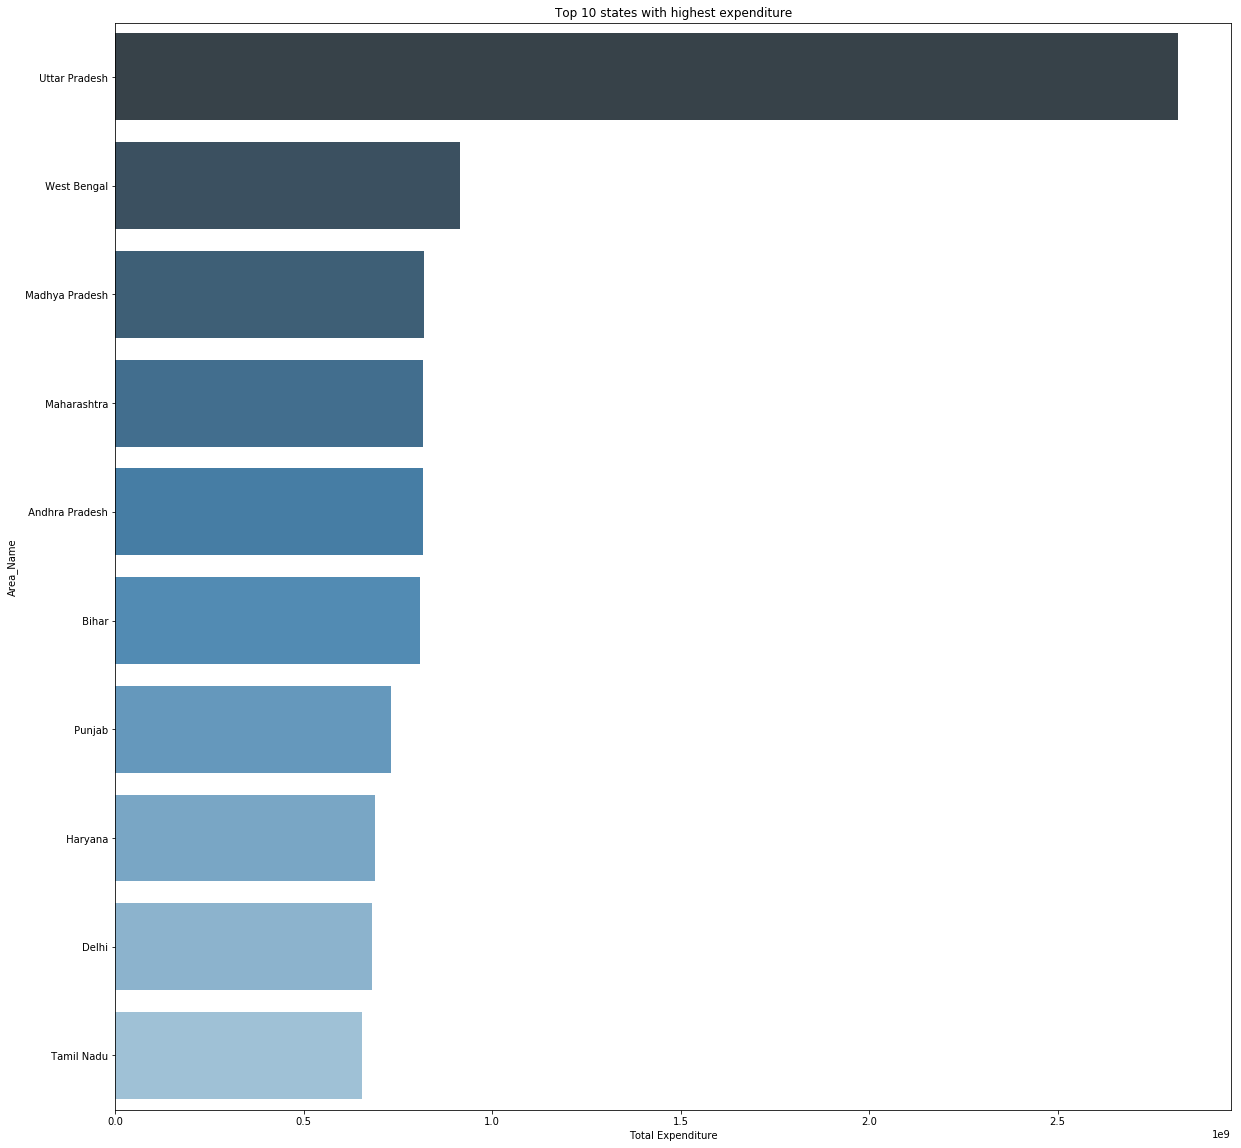

In [31]:
plt.subplots(figsize=(20,20))
ax = sns.barplot(y='Area_Name',x='Total Expenditure',data=tot_exp,palette='Blues_d')
ax.set_title('Top 10 states with highest expenditure')